In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv('logistic_regression.csv')

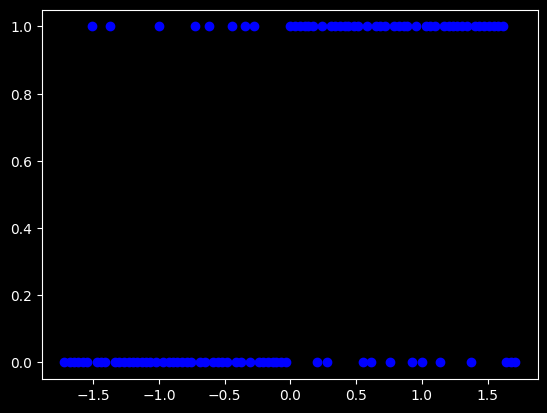

In [12]:
X = np.array(data.x)
Y = np.array(data.y)
X = X + np.random.normal(0, 0.1, size=X.shape)
X = (X - X.mean()) / X.std()
X = X.reshape(-1,1)
np.random.seed(42)
flip_mask = np.random.rand(len(Y)) < 0.15   # 15% label noise
Y[flip_mask] = 1 - Y[flip_mask]
plt.scatter(X,Y,color="blue")
plt.show()

In [13]:
def LogisticFunction(z):
    return 1.0/ (1.0 + np.exp(-z))

In [14]:
def GradientCalculation(X,y,theta):
   h = LogisticFunction(X @ theta)
   m = len(data)
   return (X.T@ (h-y))/m

In [15]:
def GradientDescent(X,y,LearningRate=0.01,Iterations=100,tolerance=1e-7):
    x_b = np.c_[np.ones((X.shape[0],1)),X]
    theta = np.zeros(x_b.shape[1])
    for i in range(Iterations):
        gradient = GradientCalculation(x_b,y,theta)
        theta -= LearningRate*gradient
    return theta

In [16]:
def predict(x,theta,threshold=0.5):
    x_b = np.c_[np.ones((x.shape[0],1)),x]
    probs = LogisticFunction(x_b @ theta)
    return (probs>=threshold).astype(int)

In [9]:
theta = GradientDescent(X, Y, 0.1, int(50000))
preds = predict(X, theta)

accuracy = np.mean(preds == Y)
print("Theta:", theta)
print("Accuracy:", accuracy*100, "%")


Theta: [-0.18785293  1.23118453]
Accuracy: 75.24752475247524 %


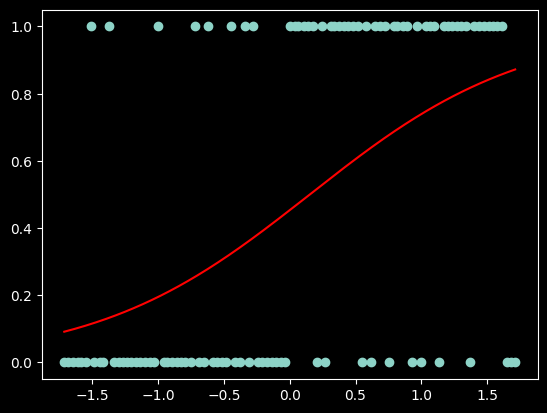

In [10]:
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_b = np.c_[np.ones((x_vals.shape[0],1)), x_vals]
y_vals = LogisticFunction(X_b @ theta)

plt.scatter(X, Y)
plt.plot(x_vals, y_vals, color='red')
plt.show()
